# RNN(Recurrent Neural Network) 순환 신경망

- 텍스트 데이터  
    텍스트 데이터는 순서가 중요한 순차 데이터  
    **입력한 데이터를 기억하는 기능**이 매우 중요하다

    - ex) "별로지만 추천해요" : 추천은 하지만 "별로"라는 것을 기억해야 무작정 추천하지는 않을 것이다.

순환신경망에서의 활성화 함수: tanh함수  
tanh함수는 값을 -1~1사이값으로 만든다

In [2]:
from tensorflow import keras

In [3]:
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=300)

In [4]:
train_input.shape

(25000,)

In [5]:
# 218개의 단어로 이루어진 한 문장이다.
len(train_input[1])

189

In [6]:
train_target[:10]
# 1 = 긍정 / 2 = 부정

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target)

In [8]:
# pad_sequences : 길이가 중구난방인 문장들을 maxlen을 기준으로 길이를 맞춰준다.
# 긴 경우는 잘라내고 짧은 경우는 0으로 채운다
# 잘라낼 때에는 앞에서부터 잘라낸다 -> 뒤에있는 단어가 더 중요하다고 판단한다.(모델 설계가 그렇게 되어있음, 바꿀수 있긴함)
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen = 100)

In [9]:
train_seq.shape

(18750, 100)

In [10]:
print(train_seq[0])

[  2   7   2  11 269   8   2   2   2  23   2 148   2 117   2   2   8   2
  19   2   8   2   4   2   2  26  43   2  11  14   2  22  18  32   7 178
   2   7   2  10  10  99  78  15   2   2   2   2   5   2   2  26   2  38
 117   8  81  11  14   2  22  10  10  13  66 197   7   4   2   2  22   2
  33   4   2  33   4 130   7   4  22  54   4   2 216   8 113   8  81   2
  19   4   2   2  11   4   2   2   2   2]


In [11]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [12]:
val_seq.shape

(6250, 100)

In [13]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 300))) # 100의 token을 가지고 있고 300의 범위 안에있다
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

/Users/chojungseok/Desktop/code/DAMF2/ML/DL/DLvenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
train_oh = keras.utils.to_categorical(train_seq)

In [15]:
train_oh.shape

(18750, 100, 300)

In [16]:
train_oh[0][0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         2,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# model.compile(optimizer = rmsprop,
#               loss= 'binary_crossentropy',
#               metrics = ['accuracy']
#               )

# es = keras.callbacks.EarlyStopping(patience=3)
# result = model.fit(
#     train_oh,
#     train_target,
#     epochs = 100,
#     validation_data =(val_oh, val_target),
#     callbacks = [es]

# )

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5202 - loss: 0.6947 - val_accuracy: 0.5736 - val_loss: 0.6792
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5882 - loss: 0.6729 - val_accuracy: 0.6122 - val_loss: 0.6600
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6297 - loss: 0.6521 - val_accuracy: 0.6488 - val_loss: 0.6405
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6655 - loss: 0.6312 - val_accuracy: 0.6720 - val_loss: 0.6196
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6885 - loss: 0.6102 - val_accuracy: 0.6960 - val_loss: 0.6033
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5940 - val_accuracy: 0.7003 - val_loss: 0.5902
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7174 - loss: 0.5781 - val_accuracy: 0.7150 - val_loss: 0.5773
Epoch 8/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7264 - loss: 0.5645 - val_accu

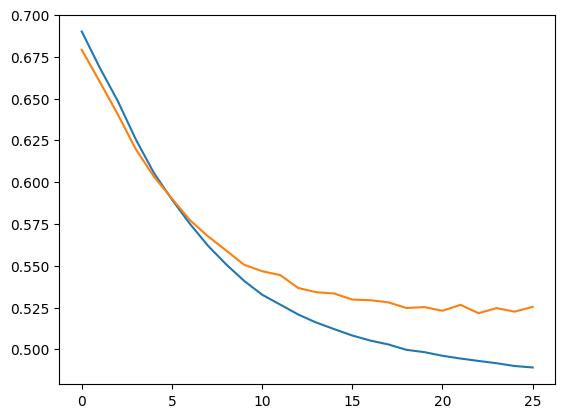

In [20]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [22]:
model2 = keras.Sequential()

# one-hot 대신 embedding
model2.add(keras.layers.Embedding(
    300, 
    16, 
    input_length = 100
))

model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

/Users/chojungseok/Desktop/code/DAMF2/ML/DL/DLvenv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
model2.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

es = keras.callbacks.EarlyStopping(patience=2)
result = model2.fit(train_seq,
                    train_target,
                    epochs = 100,
                    validation_data = (val_seq, val_target),
                    callbacks = [es])

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5304 - loss: 0.6890 - val_accuracy: 0.6621 - val_loss: 0.6240
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6650 - loss: 0.6173 - val_accuracy: 0.6376 - val_loss: 0.6532
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.5935 - val_accuracy: 0.6902 - val_loss: 0.5968
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5749 - val_accuracy: 0.6894 - val_loss: 0.5910
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7172 - loss: 0.5713 - val_accuracy: 0.7182 - val_loss: 0.5748
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7381 - loss: 0.5426 - val_accuracy: 0.7178 - val_loss: 0.5663
Epoch 7/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7363 - loss: 0.5478 - val_accuracy: 0.7048 - val_loss: 0.5928
Epoch 8/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7364 - loss: 0.5394 - val_accu